# 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline 

# 한글 문제 해결
# matplotlib의 기본폰트에서 한글이 지원되지 않음
# 시스템별로 한글 지원하는 폰트로 변경해야 함

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [3]:
data = pd.read_csv("data/final_data.csv", index_col=0)

In [4]:
data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0.0,0.0,1.0,1.0,NaN,NaN,NaN,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,1.0,0.0,0.0,1.0,NaN,NaN,NaN,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,05-24,16,월
439,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,05-24,16,월
440,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,05-24,16,월
441,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,05-24,16,월


# 함수
### - 오름차순 정렬 함수 정의

In [5]:
def ascend_sum(df):
    df['합계'] = df.sum(axis=1)
    df = df.sort_values('합계', ascending=True) # 합계를 기준으로 정렬
    df = df.iloc[:, :-1] # 합계 열 제외
    return df

### - 막대 그래프 함수 정의

In [6]:
def stack_bar(df, kind='bar', text=None, stack=False):
    df.plot(kind=kind, figsize=(10,10), fontsize=15, stacked=stack),
    plt.ylabel(''),
    plt.title(text),
    plt.show()

### - 메뉴 리스트 저장

In [7]:
menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥',
             '파스타', '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

# EDA
### (1) 성별, 연령대별 1순위 음식 분류

In [8]:
a1 = data.pivot_table("기온",
                      columns=["성별","연령대"],
                      index="1순위",
                      aggfunc="count")
a1

성별     남자                      여자                  
연령대    노년   중장년    청년   청소년    노년   중장년    청년   청소년
1순위                                                
분식    2.0   1.0   4.0   7.0   2.0   6.0  10.0   8.0
양식    NaN   6.0  21.0  26.0   2.0   5.0  15.0   6.0
일식    4.0   2.0  24.0  24.0   4.0   3.0  15.0  11.0
중식    2.0   6.0   4.0   8.0   NaN   3.0   4.0   NaN
한식   19.0  35.0  47.0  18.0  15.0  30.0  31.0  13.0

In [9]:
a1 = ascend_sum(a1)
a1

성별     남자                      여자                  
연령대    노년   중장년    청년   청소년    노년   중장년    청년   청소년
1순위                                                
중식    2.0   6.0   4.0   8.0   NaN   3.0   4.0   NaN
분식    2.0   1.0   4.0   7.0   2.0   6.0  10.0   8.0
양식    NaN   6.0  21.0  26.0   2.0   5.0  15.0   6.0
일식    4.0   2.0  24.0  24.0   4.0   3.0  15.0  11.0
한식   19.0  35.0  47.0  18.0  15.0  30.0  31.0  13.0

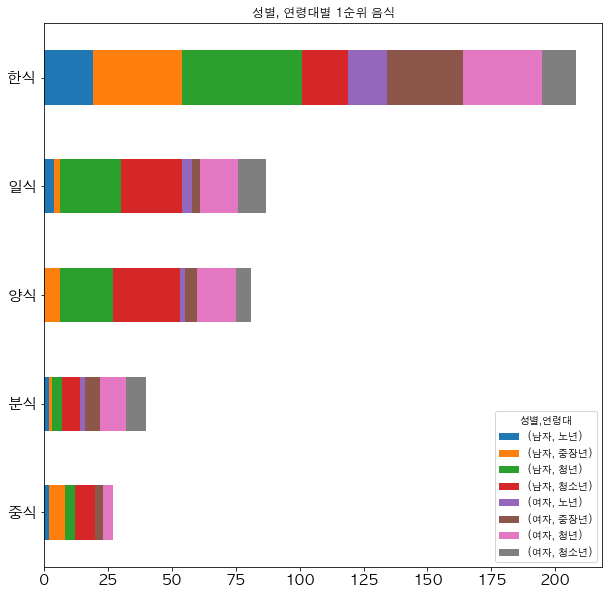

In [10]:
stack_bar(a1, kind='barh', text='성별, 연령대별 1순위 음식', stack=True)

### (2) 성별에 따른 메뉴 분포

In [11]:
a2 = ascend_sum(data.groupby('성별')[menu_list].sum().T)
a2

성별,남자,여자
볶음밥,37.0,25.0
칼국수,42.0,33.0
김밥,33.0,42.0
우동,43.0,37.0
햄버거,62.0,27.0
짬뽕,65.0,27.0
짜장면,71.0,28.0
냉면,60.0,41.0
메밀소바,57.0,46.0
된장찌개,67.0,43.0


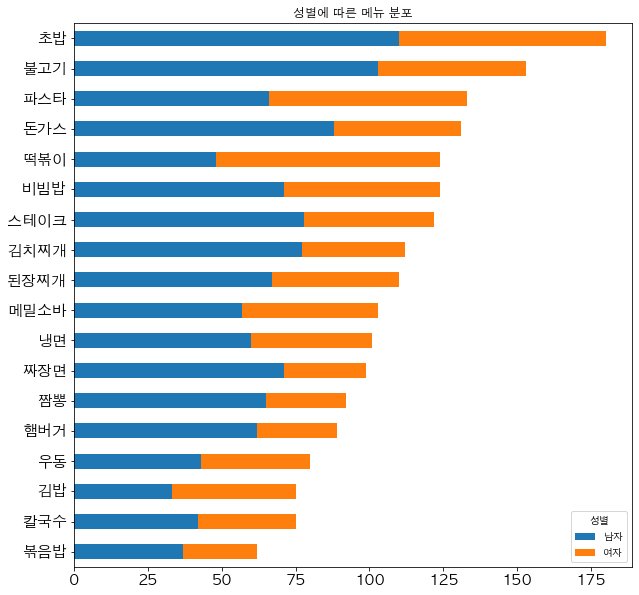

In [12]:
stack_bar(a2, kind='barh', text='성별에 따른 메뉴 분포', stack=True)

### (3) 기분에 따른 메뉴 분포

In [13]:
a3 = ascend_sum(data.groupby('기분')[menu_list].sum().T)
a3

기분,분노,우울,중립,행복
볶음밥,5.0,12.0,20.0,25.0
칼국수,2.0,15.0,25.0,33.0
김밥,2.0,17.0,26.0,30.0
우동,1.0,14.0,27.0,38.0
햄버거,3.0,19.0,31.0,36.0
짬뽕,3.0,16.0,32.0,41.0
짜장면,7.0,16.0,36.0,40.0
냉면,5.0,18.0,28.0,50.0
메밀소바,3.0,26.0,35.0,39.0
된장찌개,2.0,22.0,35.0,51.0


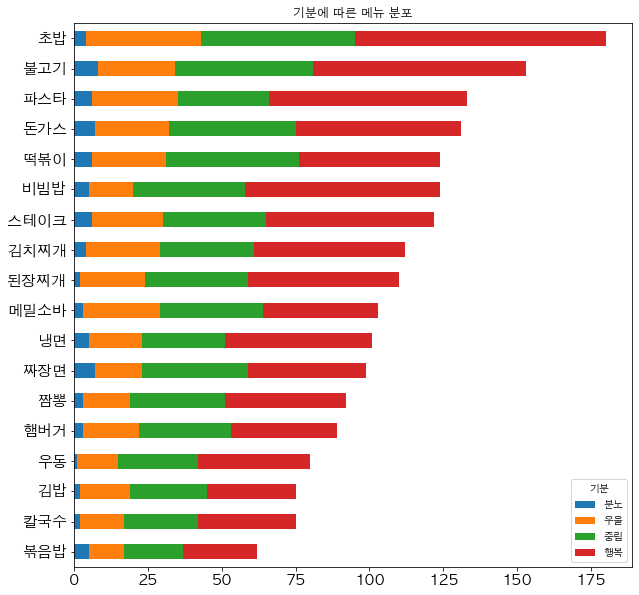

In [14]:
stack_bar(a3, kind='barh', text='기분에 따른 메뉴 분포', stack=True)

### (4) 요일에 따른 메뉴

In [15]:
a4 = data.groupby(['요일']).sum()[menu_list]
a4

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
요일,,,,,,,,,,,,,,,,,,
목,6.0,3.0,2.0,6.0,2.0,5.0,4.0,3.0,7.0,3.0,4.0,3.0,2.0,4.0,7.0,4.0,2.0,2.0
수,13.0,14.0,6.0,8.0,10.0,5.0,13.0,6.0,16.0,13.0,9.0,17.0,6.0,8.0,13.0,4.0,8.0,9.0
월,25.0,13.0,9.0,22.0,20.0,18.0,20.0,21.0,17.0,11.0,16.0,33.0,17.0,23.0,25.0,17.0,22.0,11.0
일,54.0,36.0,34.0,43.0,46.0,47.0,48.0,19.0,45.0,55.0,36.0,61.0,32.0,32.0,47.0,21.0,43.0,44.0
토,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0
화,54.0,33.0,24.0,31.0,46.0,37.0,39.0,26.0,48.0,40.0,24.0,64.0,23.0,35.0,39.0,15.0,22.0,26.0


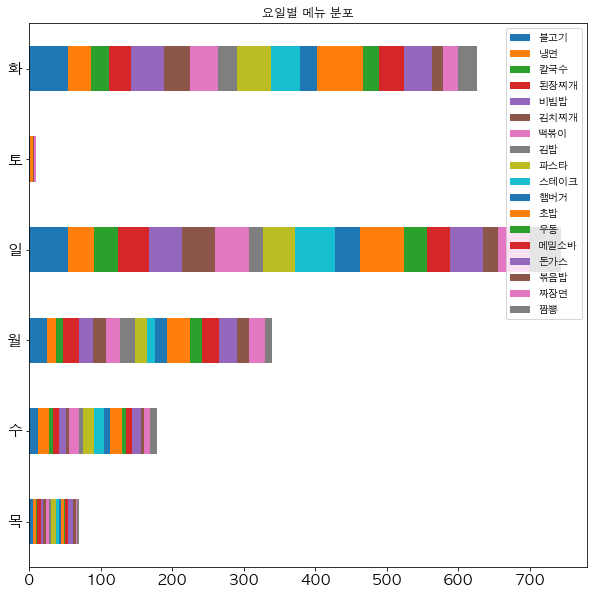

In [16]:
stack_bar(a4, kind='barh', text='요일별 메뉴 분포', stack=True)

### (5) 연령에 따른 전체메뉴

In [17]:
a5 = ascend_sum(data.groupby(['연령대']).sum()[menu_list])
a5

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
연령대,,,,,,,,,,,,,,,,,,
노년,13.0,6.0,6.0,9.0,9.0,7.0,6.0,12.0,4.0,5.0,7.0,15.0,10.0,11.0,10.0,12.0,10.0,11.0
중장년,37.0,15.0,9.0,19.0,37.0,17.0,15.0,14.0,23.0,31.0,8.0,36.0,6.0,21.0,7.0,11.0,17.0,21.0
청소년,45.0,46.0,33.0,33.0,31.0,37.0,43.0,16.0,42.0,46.0,34.0,56.0,36.0,31.0,40.0,14.0,33.0,31.0
청년,58.0,34.0,27.0,49.0,47.0,51.0,60.0,33.0,64.0,40.0,40.0,73.0,28.0,40.0,74.0,25.0,39.0,29.0


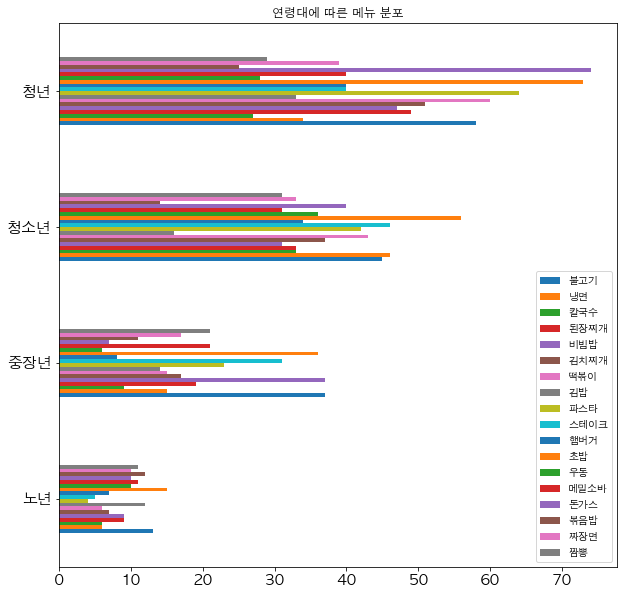

In [18]:
stack_bar(a5, kind='barh', text='연령대에 따른 메뉴 분포', stack=False)

### (6) 시간대에 따른 메뉴

In [19]:
a6 = ascend_sum(data.groupby('시간')[menu_list].sum().T)
a6

시간,0,2,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
볶음밥,2.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,5.0,4.0,5.0,6.0,13.0,6.0,4.0,1.0,5.0,2.0,0.0,1.0
칼국수,1.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0,5.0,5.0,8.0,5.0,11.0,20.0,3.0,0.0,5.0,2.0,0.0,2.0
김밥,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,5.0,5.0,7.0,10.0,12.0,9.0,5.0,1.0,2.0,4.0,4.0,1.0
우동,1.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,3.0,4.0,9.0,8.0,12.0,16.0,3.0,1.0,6.0,1.0,2.0,3.0
햄버거,1.0,0.0,0.0,1.0,1.0,3.0,5.0,1.0,7.0,3.0,4.0,6.0,17.0,17.0,6.0,2.0,3.0,6.0,4.0,2.0
짬뽕,2.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,7.0,7.0,11.0,4.0,13.0,21.0,4.0,2.0,9.0,4.0,2.0,0.0
짜장면,1.0,0.0,0.0,0.0,1.0,6.0,6.0,2.0,6.0,7.0,3.0,4.0,15.0,22.0,8.0,2.0,8.0,3.0,3.0,2.0
냉면,0.0,0.0,1.0,0.0,0.0,4.0,5.0,3.0,4.0,8.0,12.0,9.0,14.0,21.0,6.0,0.0,10.0,3.0,0.0,1.0
메밀소바,1.0,0.0,0.0,0.0,1.0,4.0,5.0,3.0,11.0,6.0,10.0,13.0,17.0,17.0,7.0,0.0,2.0,2.0,2.0,2.0
된장찌개,1.0,0.0,0.0,1.0,2.0,5.0,8.0,3.0,14.0,3.0,11.0,4.0,19.0,18.0,5.0,1.0,10.0,2.0,1.0,2.0


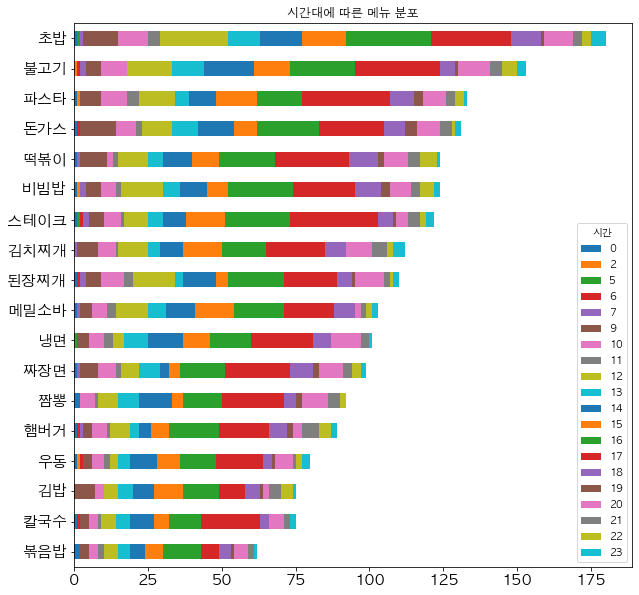

In [20]:
stack_bar(a6, kind='barh', text='시간대에 따른 메뉴 분포', stack=True)

### (7) 기온에 따른 메뉴

In [21]:
a7 = data.groupby(['기온']).sum()[menu_list].reset_index()
a7

,기온,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,10.7,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,13.3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
2,13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,14.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0
4,14.3,2.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,25.7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70,25.9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71,26.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72,26.3,1.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0


In [22]:
a7["구간"] = pd.cut(a7["기온"], 5, right=False)

In [23]:
a7 = a7.groupby(['구간']).sum().iloc[:, 1:]
a7

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
구간,,,,,,,,,,,,,,,,,,
"[10.7, 13.86)",1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0
"[13.86, 17.02)",30.0,12.0,12.0,25.0,28.0,28.0,29.0,22.0,24.0,19.0,24.0,39.0,17.0,24.0,32.0,13.0,23.0,8.0
"[17.02, 20.18)",52.0,38.0,33.0,43.0,38.0,45.0,46.0,18.0,50.0,52.0,32.0,56.0,31.0,29.0,45.0,21.0,42.0,41.0
"[20.18, 23.34)",55.0,41.0,23.0,30.0,49.0,31.0,37.0,26.0,44.0,40.0,20.0,67.0,25.0,41.0,40.0,18.0,24.0,30.0
"[23.34, 26.516)",15.0,9.0,5.0,11.0,8.0,8.0,11.0,9.0,14.0,8.0,11.0,15.0,5.0,8.0,12.0,9.0,8.0,11.0


In [24]:
a7.index = '10°C', '15°C', '20°C', '23°C', '25°C'

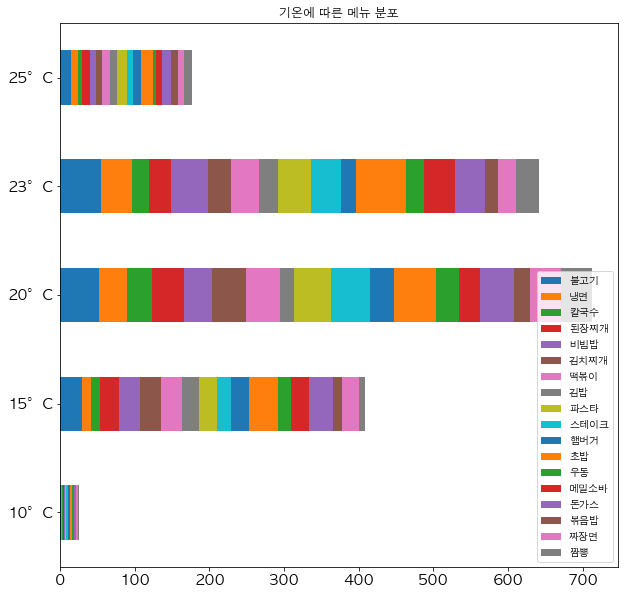

In [25]:
stack_bar(a7, kind='barh', text='기온에 따른 메뉴 분포', stack=True)

# 상관분석

In [26]:
import scipy.stats as stats

In [27]:
# https://datascienceschool.net/03%20machine%20learning/02.02%20%EB%B2%94%EC%A3%BC%ED%98%95%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%B2%98%EB%A6%AC.html

In [28]:
data = data.iloc[:, 1:]
data.head()

,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,습도,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,99.1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,05-16,14,일
1,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,97.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,05-16,15,일
2,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,97.0,...,0.0,0.0,1.0,1.0,NaN,NaN,NaN,05-16,15,일
3,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,97.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,05-16,15,일
4,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,94.7,...,1.0,0.0,0.0,1.0,NaN,NaN,NaN,05-16,16,일


In [29]:
data.describe()

,기온,강수량,습도,기압,전운량,불고기,냉면,칼국수,된장찌개,비빔밥,...,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,시간
count,443.000000,443.000000,443.000000,443.000000,443.000000,378.000000,378.000000,378.000000,378.000000,378.000000,...,255.000000,255.000000,316.000000,316.000000,316.000000,316.000000,197.000000,197.000000,197.000000,443.000000
mean,19.840181,0.863657,74.963205,996.857788,5.765237,0.404762,0.267196,0.198413,0.291005,0.328042,...,0.478431,0.349020,0.569620,0.253165,0.325949,0.414557,0.314721,0.502538,0.467005,15.133183
std,2.944411,1.302716,21.564735,5.832298,4.076082,0.491496,0.443082,0.399333,0.454828,0.470123,...,0.500517,0.477598,0.495915,0.435514,0.469472,0.493427,0.465588,0.501267,0.500181,3.706159
min,10.700000,0.000000,28.000000,980.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,0.000000,58.000000,990.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
50%,20.100000,0.000000,79.000000,998.600000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,16.000000
75%,22.000000,1.900000,95.000000,1001.600000,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000
max,26.500000,7.200000,99.400000,1006.200000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000


# 함수
### - 상관계수 함수 정의
#### 범주형 데이터용 : One-Hot Encoding 한 후에 상관분석

In [30]:
def correlation(data, method=None):
    
    # One-Hot Encoding
    data = pd.get_dummies(data)
    
    # Correlation Coefficient
    corr = data.corr(method=method)
    

    # Visualization
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(corr,
                annot=True,
                fmt='.2f',
                linewidths=.3,
                cmap='Greens')
    plt.show()
    
    return corr

#### 수치형 데이터용

In [31]:
def no_onehot_corr(data, method=None):
    
    # Correlation Coefficient
    corr = data.corr(method=method)

    
    # Visualization
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(corr,
                annot=True,
                fmt='.2f',
                linewidths=.3,
                cmap='Greens')
    plt.show()
    
    return corr

### (1) 수치형
### - Heatmap 함수 정의

In [32]:
def tri_heatmap(data):
    
    # Correlation Coefficient
    data = data.corr()
    

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(8,8))
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)]=True

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(data,
                annot=True,
                mask=mask,
                cmap='RdYlBu_r',
                linewidths=.5,
                cbar_kws={"shrink": .5},
                vmin=-1, vmax=1)
    plt.show()
    
    return data

### (2) 범주형 함수
### - 카이제곱검정 함수 정의

In [33]:
def chi_square(data):
    
    # One-Hot Encoding
    # data = pd.get_dummies(data)
    
    
    # Chi-Squared Test
    chi, pvalue, dof, expected = stats.chi2_contingency(data)

    print("Chi Square: {}".format(chi),
          "P-value: {}".format(pvalue),
          "자유도 수: {}".format(dof),
          "기대값: {}".format(pd.DataFrame(expected)),
          "측정값: {}".format(data), sep="\n")

# 분석
- 수치형 변수 : Pearson Correlation Coefficient
- 범주형 변수 : Spearman Correlation Coefficient, Kendall Rank Correlation Coefficient (순위척도)

### (1) 수치형 (기온, 강수량, 습도, 기압, 전운량, 시간)

In [34]:
numerical = data[['기온', '강수량', '습도', '기압', '전운량', '시간']]
numerical

,기온,강수량,습도,기압,전운량,시간
0,17.5,1.6,99.1,993.6,10,14
1,18.5,1.4,97.0,989.6,10,15
2,18.5,1.4,97.0,989.6,10,15
3,18.5,1.4,97.0,989.6,10,15
4,20.6,2.6,94.7,990.5,10,16
...,...,...,...,...,...,...
438,23.8,0.0,52.2,994.6,3,16
439,22.1,0.0,45.1,999.9,1,16
440,22.7,0.0,57.0,997.9,1,16
441,22.7,0.0,57.0,997.9,1,16


##### 피어슨 상관계수

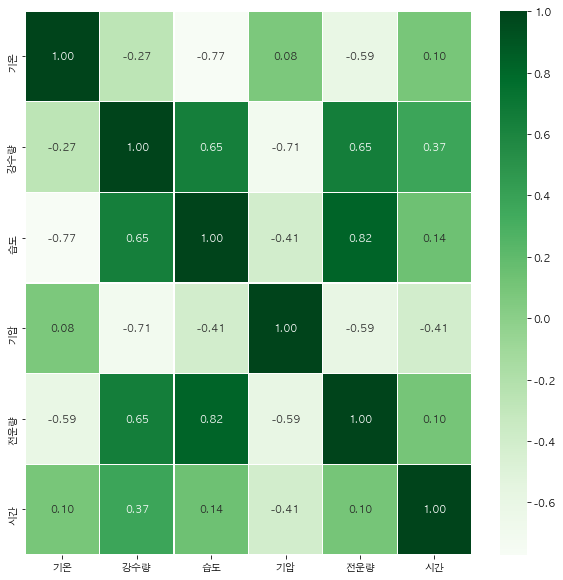

,기온,강수량,습도,기압,전운량,시간
기온,1.000000,-0.272163,-0.771059,0.078878,-0.594680,0.095024
강수량,-0.272163,1.000000,0.645590,-0.707713,0.653393,0.371434
습도,-0.771059,0.645590,1.000000,-0.408771,0.824310,0.139275
기압,0.078878,-0.707713,-0.408771,1.000000,-0.587020,-0.409399
전운량,-0.594680,0.653393,0.824310,-0.587020,1.000000,0.103166
시간,0.095024,0.371434,0.139275,-0.409399,0.103166,1.000000


In [35]:
no_onehot_corr(numerical, method='pearson')

##### Heatmap

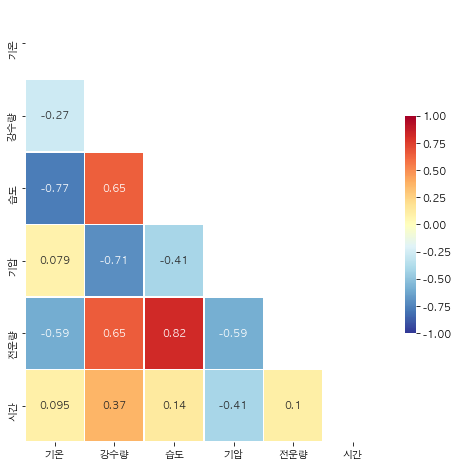

,기온,강수량,습도,기압,전운량,시간
기온,1.000000,-0.272163,-0.771059,0.078878,-0.594680,0.095024
강수량,-0.272163,1.000000,0.645590,-0.707713,0.653393,0.371434
습도,-0.771059,0.645590,1.000000,-0.408771,0.824310,0.139275
기압,0.078878,-0.707713,-0.408771,1.000000,-0.587020,-0.409399
전운량,-0.594680,0.653393,0.824310,-0.587020,1.000000,0.103166
시간,0.095024,0.371434,0.139275,-0.409399,0.103166,1.000000


In [36]:
tri_heatmap(numerical)

##### 산점 행렬도 (SPM : Scatter Plot Matrix)

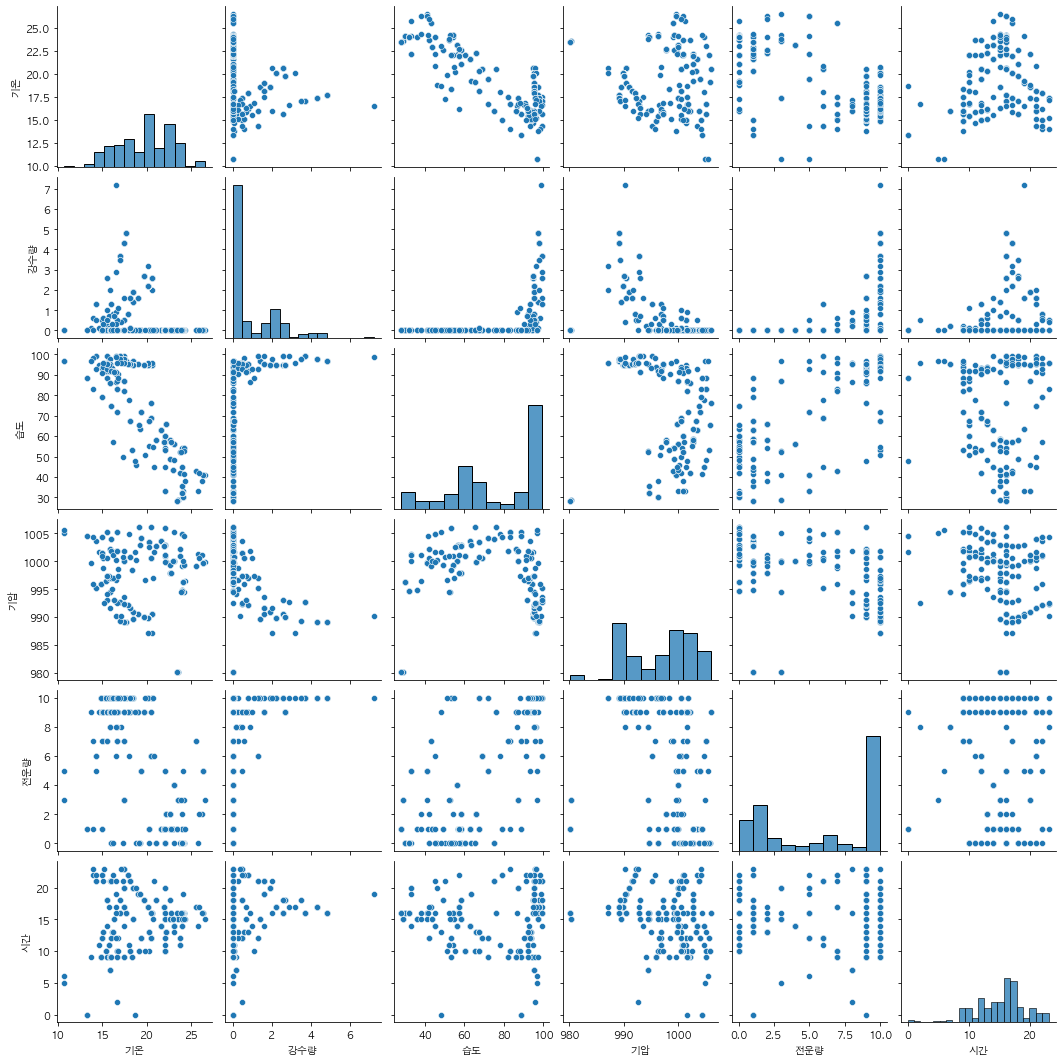

In [37]:
sns.pairplot(data=numerical)
plt.show()

### (2) 범주형
### 명목형 (성별, 연령대, 기분)

In [38]:
norminal = data[['성별', '연령대', '기분']]
norminal

,성별,연령대,기분
0,남자,청년,행복
1,여자,중장년,분노
2,남자,청년,중립
3,여자,청년,행복
4,남자,청년,행복
...,...,...,...
438,남자,노년,행복
439,남자,노년,행복
440,여자,노년,행복
441,남자,노년,우울


##### - One-Hot Encoding 후,
##### 스피어만 상관계수

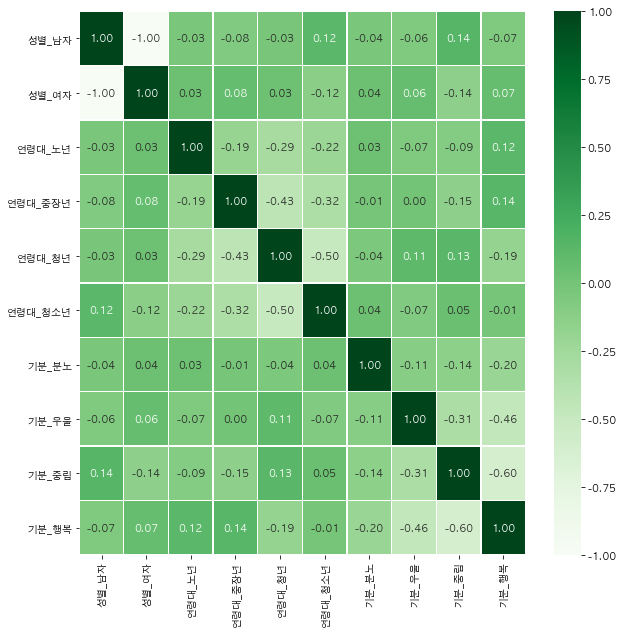

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년,기분_분노,기분_우울,기분_중립,기분_행복
성별_남자,1.000000,-1.000000,-0.033980,-0.076825,-0.025403,0.123305,-0.038379,-0.063448,0.144189,-0.065007
성별_여자,-1.000000,1.000000,0.033980,0.076825,0.025403,-0.123305,0.038379,0.063448,-0.144189,0.065007
연령대_노년,-0.033980,0.033980,1.000000,-0.188859,-0.288231,-0.218652,0.025517,-0.066851,-0.087302,0.121839
연령대_중장년,-0.076825,0.076825,-0.188859,1.000000,-0.427858,-0.324573,-0.009970,0.002336,-0.147135,0.136236
연령대_청년,-0.025403,0.025403,-0.288231,-0.427858,1.000000,-0.495355,-0.042271,0.105386,0.132543,-0.186592
연령대_청소년,0.123305,-0.123305,-0.218652,-0.324573,-0.495355,1.000000,0.037510,-0.070317,0.053138,-0.008249
기분_분노,-0.038379,0.038379,0.025517,-0.009970,-0.042271,0.037510,1.000000,-0.106723,-0.139372,-0.204570
기분_우울,-0.063448,0.063448,-0.066851,0.002336,0.105386,-0.070317,-0.106723,1.000000,-0.314590,-0.461756
기분_중립,0.144189,-0.144189,-0.087302,-0.147135,0.132543,0.053138,-0.139372,-0.314590,1.000000,-0.603015
기분_행복,-0.065007,0.065007,0.121839,0.136236,-0.186592,-0.008249,-0.204570,-0.461756,-0.603015,1.000000


In [39]:
correlation(norminal, method="spearman")

##### 켄달 상관계수

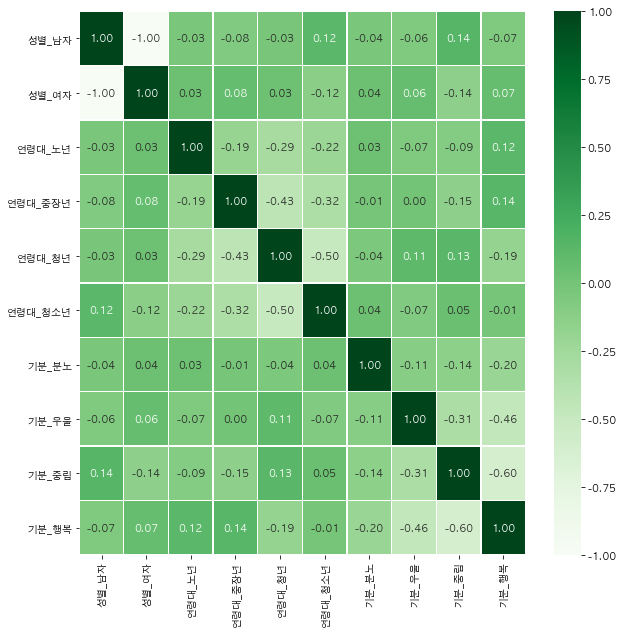

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년,기분_분노,기분_우울,기분_중립,기분_행복
성별_남자,1.000000,-1.000000,-0.033980,-0.076825,-0.025403,0.123305,-0.038379,-0.063448,0.144189,-0.065007
성별_여자,-1.000000,1.000000,0.033980,0.076825,0.025403,-0.123305,0.038379,0.063448,-0.144189,0.065007
연령대_노년,-0.033980,0.033980,1.000000,-0.188859,-0.288231,-0.218652,0.025517,-0.066851,-0.087302,0.121839
연령대_중장년,-0.076825,0.076825,-0.188859,1.000000,-0.427858,-0.324573,-0.009970,0.002336,-0.147135,0.136236
연령대_청년,-0.025403,0.025403,-0.288231,-0.427858,1.000000,-0.495355,-0.042271,0.105386,0.132543,-0.186592
연령대_청소년,0.123305,-0.123305,-0.218652,-0.324573,-0.495355,1.000000,0.037510,-0.070317,0.053138,-0.008249
기분_분노,-0.038379,0.038379,0.025517,-0.009970,-0.042271,0.037510,1.000000,-0.106723,-0.139372,-0.204570
기분_우울,-0.063448,0.063448,-0.066851,0.002336,0.105386,-0.070317,-0.106723,1.000000,-0.314590,-0.461756
기분_중립,0.144189,-0.144189,-0.087302,-0.147135,0.132543,0.053138,-0.139372,-0.314590,1.000000,-0.603015
기분_행복,-0.065007,0.065007,0.121839,0.136236,-0.186592,-0.008249,-0.204570,-0.461756,-0.603015,1.000000


In [40]:
correlation(norminal, method="kendall")

##### - 각 데이터마다 숫자를 부여 (0~3)한 후, 상관분석

     성별  연령대  기분
0     0    1   0
1     1    2   2
2     0    1   1
3     1    1   0
4     0    1   0
..   ..  ...  ..
438   0    3   0
439   0    3   0
440   1    3   0
441   0    3   3
442   1    3   0

[443 rows x 3 columns]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


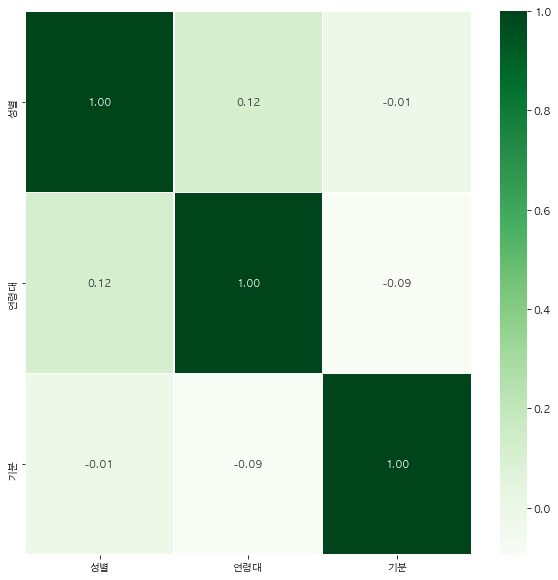

           성별       연령대        기분
성별   1.000000  0.120800 -0.014074
연령대  0.120800  1.000000 -0.094873
기분  -0.014074 -0.094873  1.000000


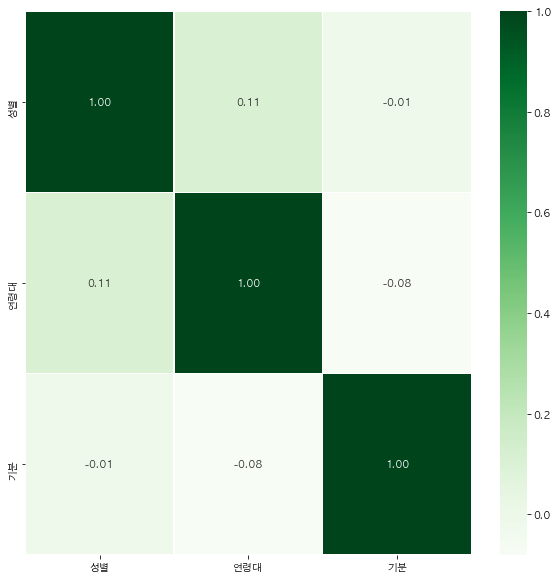

           성별       연령대        기분
성별   1.000000  0.111526 -0.013201
연령대  0.111526  1.000000 -0.080280
기분  -0.013201 -0.080280  1.000000


In [41]:
norminal2 = data[['성별', '연령대', '기분']]

sex = {"남자":0, "여자":1}
age = {"청소년":0, "청년":1, "중장년":2, "노년":3}
feeling = {"행복":0, "중립":1, "분노":2, "우울":3}

norminal2.replace({"성별":sex}, inplace=True)
norminal2.replace({"연령대":age}, inplace=True)
norminal2.replace({"기분":feeling}, inplace=True)

print(norminal2)
print(no_onehot_corr(norminal2, method="spearman"))
print(no_onehot_corr(norminal2, method="kendall"))

### 순서형 (1순위, 2순위, 3순위)

In [42]:
ordinal = data[['1순위', '2순위', '3순위']]
ordinal.head()

,1순위,2순위,3순위
0,한식,일식,중식
1,한식,중식,일식
2,일식,양식,한식
3,일식,한식,분식
4,양식,일식,분식


##### 스피어만 상관계수

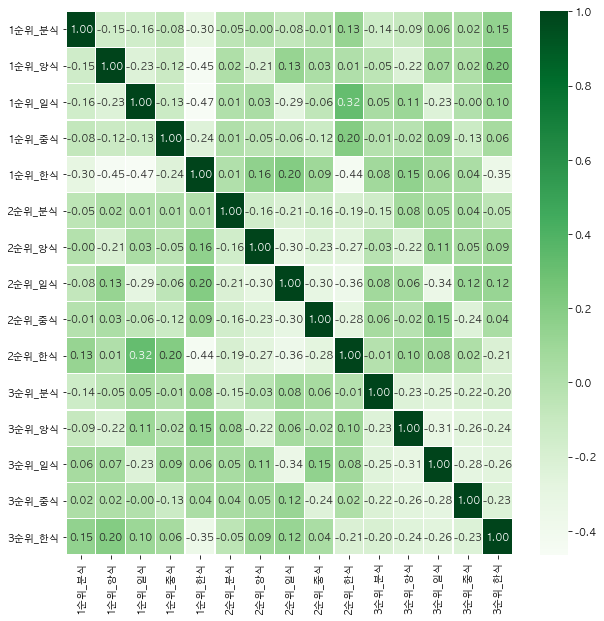

,1순위_분식,1순위_양식,1순위_일식,1순위_중식,1순위_한식,2순위_분식,2순위_양식,2순위_일식,2순위_중식,2순위_한식,3순위_분식,3순위_양식,3순위_일식,3순위_중식,3순위_한식
1순위_분식,1.000000,-0.149027,-0.155744,-0.080263,-0.296398,-0.051954,-0.004576,-0.076415,-0.009979,0.128849,-0.137637,-0.092009,0.055927,0.022690,0.146475
1순위_양식,-0.149027,1.000000,-0.233842,-0.120510,-0.445027,0.018644,-0.206884,0.128950,0.027298,0.011992,-0.047468,-0.223972,0.066061,0.016061,0.199121
1순위_일식,-0.155744,-0.233842,1.000000,-0.125942,-0.465085,0.006819,0.033811,-0.286476,-0.062621,0.320880,0.047341,0.106150,-0.231516,-0.001227,0.103134
1순위_중식,-0.080263,-0.120510,-0.125942,1.000000,-0.239681,0.010041,-0.046012,-0.056041,-0.122327,0.203020,-0.008419,-0.022117,0.093819,-0.125942,0.057443
1순위_한식,-0.296398,-0.445027,-0.465085,-0.239681,1.000000,0.005155,0.158005,0.198911,0.093074,-0.436026,0.082158,0.152413,0.056033,0.035879,-0.347971
2순위_분식,-0.051954,0.018644,0.006819,0.010041,0.005155,1.000000,-0.155895,-0.209361,-0.159451,-0.190860,-0.145077,0.077576,0.053709,0.044815,-0.052735
2순위_양식,-0.004576,-0.206884,0.033811,-0.046012,0.158005,-0.155895,1.000000,-0.295970,-0.225413,-0.269815,-0.029139,-0.221929,0.110501,0.048582,0.094380
2순위_일식,-0.076415,0.128950,-0.286476,-0.056041,0.198911,-0.209361,-0.295970,1.000000,-0.302722,-0.362351,0.079187,0.061799,-0.339188,0.116569,0.120147
2순위_중식,-0.009979,0.027298,-0.062621,-0.122327,0.093074,-0.159451,-0.225413,-0.302722,1.000000,-0.275970,0.058307,-0.018972,0.152524,-0.237368,0.039285
2순위_한식,0.128849,0.011992,0.320880,0.203020,-0.436026,-0.190860,-0.269815,-0.362351,-0.275970,1.000000,-0.008970,0.096500,0.080863,0.018378,-0.208469


In [43]:
correlation(ordinal, method="spearman")

##### 켄달 상관계수

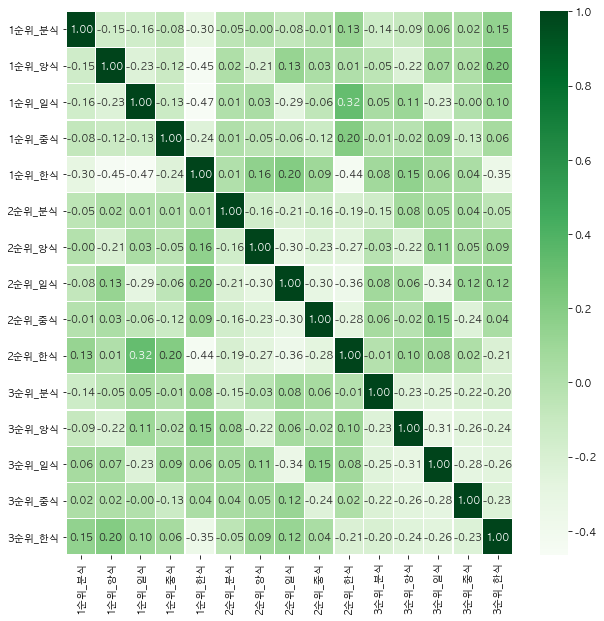

,1순위_분식,1순위_양식,1순위_일식,1순위_중식,1순위_한식,2순위_분식,2순위_양식,2순위_일식,2순위_중식,2순위_한식,3순위_분식,3순위_양식,3순위_일식,3순위_중식,3순위_한식
1순위_분식,1.000000,-0.149027,-0.155744,-0.080263,-0.296398,-0.051954,-0.004576,-0.076415,-0.009979,0.128849,-0.137637,-0.092009,0.055927,0.022690,0.146475
1순위_양식,-0.149027,1.000000,-0.233842,-0.120510,-0.445027,0.018644,-0.206884,0.128950,0.027298,0.011992,-0.047468,-0.223972,0.066061,0.016061,0.199121
1순위_일식,-0.155744,-0.233842,1.000000,-0.125942,-0.465085,0.006819,0.033811,-0.286476,-0.062621,0.320880,0.047341,0.106150,-0.231516,-0.001227,0.103134
1순위_중식,-0.080263,-0.120510,-0.125942,1.000000,-0.239681,0.010041,-0.046012,-0.056041,-0.122327,0.203020,-0.008419,-0.022117,0.093819,-0.125942,0.057443
1순위_한식,-0.296398,-0.445027,-0.465085,-0.239681,1.000000,0.005155,0.158005,0.198911,0.093074,-0.436026,0.082158,0.152413,0.056033,0.035879,-0.347971
2순위_분식,-0.051954,0.018644,0.006819,0.010041,0.005155,1.000000,-0.155895,-0.209361,-0.159451,-0.190860,-0.145077,0.077576,0.053709,0.044815,-0.052735
2순위_양식,-0.004576,-0.206884,0.033811,-0.046012,0.158005,-0.155895,1.000000,-0.295970,-0.225413,-0.269815,-0.029139,-0.221929,0.110501,0.048582,0.094380
2순위_일식,-0.076415,0.128950,-0.286476,-0.056041,0.198911,-0.209361,-0.295970,1.000000,-0.302722,-0.362351,0.079187,0.061799,-0.339188,0.116569,0.120147
2순위_중식,-0.009979,0.027298,-0.062621,-0.122327,0.093074,-0.159451,-0.225413,-0.302722,1.000000,-0.275970,0.058307,-0.018972,0.152524,-0.237368,0.039285
2순위_한식,0.128849,0.011992,0.320880,0.203020,-0.436026,-0.190860,-0.269815,-0.362351,-0.275970,1.000000,-0.008970,0.096500,0.080863,0.018378,-0.208469


In [44]:
correlation(ordinal, method="kendall")

### (3) 음식 데이터

In [45]:
menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥', '파스타',
             '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

In [46]:
menu_data = data[menu_list]
menu_data

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
439,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0
440,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0
441,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN


##### 스피어만 상관계수

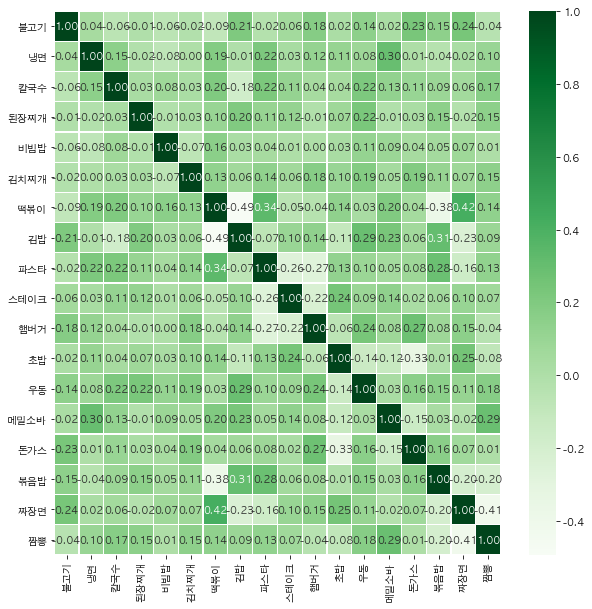

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
불고기,1.000000,0.037991,-0.058885,-0.006215,-0.059585,-0.015738,-0.087538,0.210924,-0.023136,0.057102,0.180346,0.019773,0.143326,0.023129,0.234358,0.145958,0.238838,-0.041593
냉면,0.037991,1.000000,0.149318,-0.018316,-0.078088,0.000970,0.186458,-0.009061,0.216985,0.032185,0.117231,0.108171,0.082322,0.297730,0.007183,-0.037242,0.024481,0.101578
칼국수,-0.058885,0.149318,1.000000,0.031758,0.076252,0.025827,0.204460,-0.176812,0.220131,0.114270,0.038713,0.038001,0.216280,0.125247,0.107382,0.092877,0.055564,0.172196
된장찌개,-0.006215,-0.018316,0.031758,1.000000,-0.013455,0.030706,0.102412,0.197545,0.107854,0.116550,-0.012006,0.074049,0.224918,-0.012600,0.025574,0.151348,-0.021787,0.148464
비빔밥,-0.059585,-0.078088,0.076252,-0.013455,1.000000,-0.070841,0.156526,0.025828,0.040613,0.005905,0.002223,0.026613,0.114697,0.090747,0.038787,0.049553,0.073045,0.005385
김치찌개,-0.015738,0.000970,0.025827,0.030706,-0.070841,1.000000,0.131306,0.062036,0.140697,0.063841,0.177079,0.097637,0.188375,0.046967,0.193175,0.109964,0.073045,0.147429
떡볶이,-0.087538,0.186458,0.204460,0.102412,0.156526,0.131306,1.000000,-0.493179,0.339843,-0.051549,-0.036750,0.139927,0.026425,0.195822,0.043800,-0.379838,0.420940,0.139060
김밥,0.210924,-0.009061,-0.176812,0.197545,0.025828,0.062036,-0.493179,1.000000,-0.071623,0.096998,0.138575,-0.106371,0.291175,0.232037,0.061043,0.307353,-0.232823,0.090542
파스타,-0.023136,0.216985,0.220131,0.107854,0.040613,0.140697,0.339843,-0.071623,1.000000,-0.261371,-0.270426,0.127332,0.095460,0.054652,0.078947,0.284901,-0.155126,0.130991
스테이크,0.057102,0.032185,0.114270,0.116550,0.005905,0.063841,-0.051549,0.096998,-0.261371,1.000000,-0.223665,0.244376,0.092563,0.141732,0.021486,0.056436,0.102429,0.068284


In [47]:
correlation(menu_data, method="spearman")

##### 켄달 상관계수

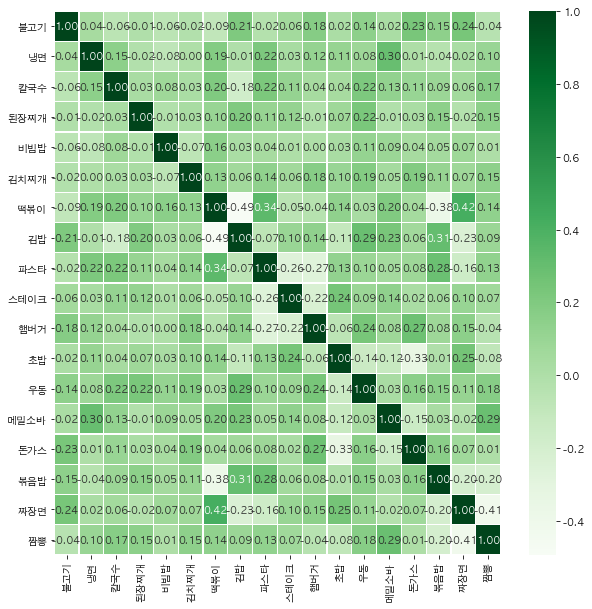

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
불고기,1.000000,0.037991,-0.058885,-0.006215,-0.059585,-0.015738,-0.087538,0.210924,-0.023136,0.057102,0.180346,0.019773,0.143326,0.023129,0.234358,0.145958,0.238838,-0.041593
냉면,0.037991,1.000000,0.149318,-0.018316,-0.078088,0.000970,0.186458,-0.009061,0.216985,0.032185,0.117231,0.108171,0.082322,0.297730,0.007183,-0.037242,0.024481,0.101578
칼국수,-0.058885,0.149318,1.000000,0.031758,0.076252,0.025827,0.204460,-0.176812,0.220131,0.114270,0.038713,0.038001,0.216280,0.125247,0.107382,0.092877,0.055564,0.172196
된장찌개,-0.006215,-0.018316,0.031758,1.000000,-0.013455,0.030706,0.102412,0.197545,0.107854,0.116550,-0.012006,0.074049,0.224918,-0.012600,0.025574,0.151348,-0.021787,0.148464
비빔밥,-0.059585,-0.078088,0.076252,-0.013455,1.000000,-0.070841,0.156526,0.025828,0.040613,0.005905,0.002223,0.026613,0.114697,0.090747,0.038787,0.049553,0.073045,0.005385
김치찌개,-0.015738,0.000970,0.025827,0.030706,-0.070841,1.000000,0.131306,0.062036,0.140697,0.063841,0.177079,0.097637,0.188375,0.046967,0.193175,0.109964,0.073045,0.147429
떡볶이,-0.087538,0.186458,0.204460,0.102412,0.156526,0.131306,1.000000,-0.493179,0.339843,-0.051549,-0.036750,0.139927,0.026425,0.195822,0.043800,-0.379838,0.420940,0.139060
김밥,0.210924,-0.009061,-0.176812,0.197545,0.025828,0.062036,-0.493179,1.000000,-0.071623,0.096998,0.138575,-0.106371,0.291175,0.232037,0.061043,0.307353,-0.232823,0.090542
파스타,-0.023136,0.216985,0.220131,0.107854,0.040613,0.140697,0.339843,-0.071623,1.000000,-0.261371,-0.270426,0.127332,0.095460,0.054652,0.078947,0.284901,-0.155126,0.130991
스테이크,0.057102,0.032185,0.114270,0.116550,0.005905,0.063841,-0.051549,0.096998,-0.261371,1.000000,-0.223665,0.244376,0.092563,0.141732,0.021486,0.056436,0.102429,0.068284


In [48]:
correlation(menu_data, method="kendall")

### (4) 인구통계학적 데이터 + 음식 데이터

In [49]:
total = pd.concat([norminal, menu_data], axis=1)
total.head()

,성별,연령대,기분,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,...,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,남자,청년,행복,1.0,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,여자,중장년,분노,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,남자,청년,중립,1.0,0.0,0.0,0.0,0.0,1.0,NaN,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
3,여자,청년,행복,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN
4,남자,청년,행복,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN


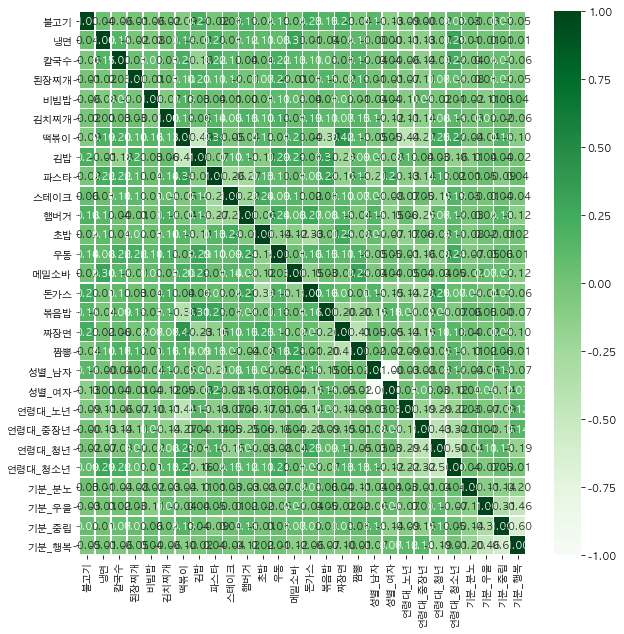

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,...,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년,기분_분노,기분_우울,기분_중립,기분_행복
불고기,1.000000,0.037991,-0.058885,-0.006215,-0.059585,-0.015738,-0.087538,0.210924,-0.023136,0.057102,...,0.126670,-0.126670,-0.086780,-0.002990,-0.021033,0.092066,0.029102,-0.026908,0.069384,-0.052871
냉면,0.037991,1.000000,0.149318,-0.018316,-0.078088,0.000970,0.186458,-0.009061,0.216985,0.032185,...,-0.004710,0.004710,-0.111208,-0.133497,-0.067920,0.293599,0.013203,-0.006756,0.010048,-0.009174
칼국수,-0.058885,0.149318,1.000000,0.031758,0.076252,0.025827,0.204460,-0.176812,0.220131,0.114270,...,-0.038439,0.038439,-0.059988,-0.143051,-0.032143,0.224062,-0.043948,0.022488,0.071165,-0.062335
된장찌개,-0.006215,-0.018316,0.031758,1.000000,-0.013455,0.030706,0.102412,0.197545,0.107854,0.116550,...,0.014644,-0.014644,-0.073651,-0.105490,0.070775,0.080278,-0.082822,0.028958,0.069771,-0.049984
비빔밥,-0.059585,-0.078088,0.076252,-0.013455,1.000000,-0.070841,0.156526,0.025828,0.040613,0.005905,...,-0.036056,0.036056,-0.100254,0.089553,-0.017897,0.006438,-0.015680,-0.111369,0.057628,0.041381
김치찌개,-0.015738,0.000970,0.025827,0.030706,-0.070841,1.000000,0.131306,0.062036,0.140697,0.063841,...,0.118596,-0.118596,-0.113304,-0.138510,0.084848,0.127044,-0.028991,0.068325,0.023204,-0.061370
떡볶이,-0.087538,0.186458,0.204460,0.102412,0.156526,0.131306,1.000000,-0.493179,0.339843,-0.051549,...,-0.048973,0.048973,-0.444511,-0.269598,0.246951,0.270415,-0.036232,-0.038323,0.159176,-0.103644
김밥,0.210924,-0.009061,-0.176812,0.197545,0.025828,0.062036,-0.493179,1.000000,-0.071623,0.096998,...,0.082726,-0.082726,0.128901,0.043685,0.030080,-0.160850,-0.112860,0.042233,0.041539,-0.023440
파스타,-0.023136,0.216985,0.220131,0.107854,0.040613,0.140697,0.339843,-0.071623,1.000000,-0.261371,...,-0.212442,0.212442,-0.127570,-0.144692,0.164445,0.022449,0.010153,0.047103,-0.088146,0.036526
스테이크,0.057102,0.032185,0.114270,0.116550,0.005905,0.063841,-0.051549,0.096998,-0.261371,1.000000,...,0.084450,-0.084450,-0.072617,0.051613,-0.148446,0.147924,0.028488,-0.007850,0.035133,-0.036526


In [50]:
correlation(total, method="kendall")